David Harrison
STC-510
Module 7 Project

Topic: Emerging Technological security threats
Place: Physical location where Agent Smith should locate an office for investigating emerging technological security threats.

Research questions:
* Are there any geographic regions or industries that are consistently identified as being at higher risk for cybersecurity threats on r/cybersecurity, and if so, why?

* Are there any geographic trends or patterns in the types of cybersecurity incidents that are reported on r/cybersecurity, such as data breaches, malware attacks, or phishing campaigns?

* What are the most commonly discussed cybersecurity threats on r/cybersecurity, and do they vary by region or industry?

In [1]:
# !pip install psaw
# !pip install praw
# !pip install networkx

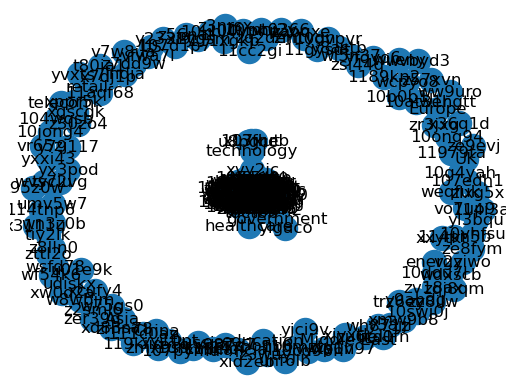

In [20]:
import requests
import json
import pandas as pd
import praw
from pmaw import PushshiftAPI
# psaw is evidently defunct, but pmaw seems to work!
from datetime import datetime
import secret

import datetime as dt
import matplotlib.pyplot as plt
import networkx as nx


api = PushshiftAPI()


reddit = praw.Reddit(user_agent="ASU STC-510 Data Wrangling Basics (by Trioptre)",
                     client_id=secret.app_id,
                     client_secret=secret.app_secret,
                     username=secret.uname,
                     password=secret.upass)


search_args = {
    'q': 'zero',
    'time_filter': 'year',
    'limit': 1000,
}

early_subs = []
for submission in reddit.subreddit('cybersecurity').search(search_args['q'], time_filter=search_args['time_filter'], limit=search_args['limit']):
    early_subs.append(submission)


# Create a list of keywords to search for:
keywords = ['zero', 'IoT']

# Create a dictionary to hold the edges between posts, industries, and locations
edges = {}

# Iterate through each submission
for submission in early_subs:
    # Check if the title contains any of the keywords
    for keyword in keywords:
        if keyword.lower() in submission.title.lower():
            # If there is a match, add an edge between the submission and the keyword
            if submission.id in edges:
                edges[submission.id].append(keyword)
            else:
                edges[submission.id] = [keyword]


# Lists of industries and locations mentioned in the submission titles:
industries = ['financial', 'healthcare', 'government', 'energy', 'education', 'retail', 'telecom', 'technology']
locations = ['US', 'UK', 'India', 'China', 'Russia', 'Europe', 'Asia', 'Middle East']

# Iterate through each submission to look for industries and locations:
for submission in early_subs:

    for industry in industries:
        if industry in submission.title.lower():
            # If there is a match, add an edge between the submission and the industry
            if submission.id in edges:
                edges[submission.id].append(industry)
            else:
                edges[submission.id] = [industry]
    # Check if the title contains any of the locations listed above:
    for location in locations:
        if location in submission.title.lower():
            # If there is a match, create an edge to link the submission and the location:
            if submission.id in edges:
                edges[submission.id].append(location)
            else:
                edges[submission.id] = [location]

# Use networkx to create a plot/graph:
G = nx.Graph()

# Add nodes for each post, industry, and location
for submission in early_subs:
    G.add_node(submission.id, type='post', title=submission.title)
for industry in industries:
    G.add_node(industry, type='industry')
for location in locations:
    G.add_node(location, type='location')

# Add edges for each post, industry, location, and keyword
for source in edges:
    for target in edges[source]:
        G.add_edge(source, target)

# Display the graph
# I was not able to figure out how to only display the keywords and submission metadata, or add links between the nodes. The plot is pretty messy, but this is as far as I got...
fig, ax = plt.subplots()
pos = nx.spring_layout(G)
nx.draw(G, pos=pos, with_labels=True, ax=ax)
plt.show()



Search terms:
cyberespionage
state-sponsored attacks
international sanctions
malware
ransomware
phishing
data breach
zero-day vulnerability
Advanced Persistent Threat (APT)



What kind of data to I have? (Numerical, textual, network, geocoded, etc.)

- Textual

 Helpful resources for background on emerhging technological threats:

1. Lu, Y., Zhu, W., & Liu, P. (2020). Deep learning for cybersecurity: A survey. IEEE Communications Surveys & Tutorials, 22(3), 1593-1633.

This article explores the potential of deep learning techniques in addressing cybersecurity threats, which are constantly evolving and becoming more complex. The authors discuss how deep learning can be applied to tasks such as detecting advanced persistent threats (APTs) and analyzing new forms of malware. They also explore emerging challenges and benefits of using deep learning in cybersecurity and suggest areas for further research to keep up with evolving threats.


2. Amin, R., Chen, J., & Ganesan, D. (2019). A survey of security and privacy issues in smart grid. IEEE Communications Surveys & Tutorials, 21(3), 2526-2553.

The authors delve into the emerging technological threats to smart grid systems, which are becoming more interconnected and reliant on digital technology. The authors review current security threats and vulnerabilities, such as cyber attacks on power grids and data breaches, and propose strategies for improving the security and privacy of smart grids. They also highlight the need for ongoing research to identify and address emerging threats as they evolve.


3. Jansen, W. A., & Scarfone, K. (2013). Guidelines for securing wireless local area networks (WLANs). National Institute of Standards and Technology, Special Publication 800-153.

This article provides guidelines for securing wireless local area networks. The authors highlight the emerging technological threats associated with WLANs, such as the proliferation of mobile devices and the increasing complexity of wireless networks. They provide recommendations for securing WLANs at the network, device, and user levels, and stress the importance of ongoing research and development to stay ahead of emerging threats.


In [11]:
# PushshiftAPI was giving me two errors:

# /Users/david/opt/anaconda3/lib/python3.9/site-packages/psaw/PushshiftAPI.py:192: UserWarning: Got non 200 code 404
#   warnings.warn("Got non 200 code %s" % response.status_code)
# /Users/david/opt/anaconda3/lib/python3.9/site-packages/psaw/PushshiftAPI.py:180: UserWarning: Unable to connect to pushshift.io. Retrying after backoff.
#   warnings.warn("Unable to connect to pushshift.io. Retrying after backoff.")

# api = PushshiftAPI(reddit)


# Commenting the following out due to issues with the PushshiftAPI
# early_subs = []
# search_args = {
#     'q': 'zero day',
#     'after': int(datetime(2022,2,1).timestamp()),
#     'before': int(datetime(2022,3,1).timestamp()),
#     'limit':1000,
# # }

# early_subs += list(api.search_submissions(**search_args))


# early_subs = []
# for submission in reddit.subreddit('cybersecurity').search('zero day', time_filter='month', limit=1000):
#     early_subs.append(submission)

# topiclist = []
# for submission in early_subs:
#     topiclist.append(submission.id)
#     print(submission.title, submission.id)

# print(topiclist)